In [3]:
# A floresta aleatória, como o próprio nome indica, consiste em um grande número de árvores de decisão individuais que funcionam como um conjunto. Cada árvore individual na floresta aleatória gera uma previsão de classe e a classe com mais votos se torna a previsão do nosso modelo.

# O conceito fundamental por trás da floresta aleatória é simples, mas poderoso: a sabedoria das multidões. Na linguagem da ciência de dados, a razão pela qual o modelo funciona tão bem está associado ao fato de que um grande número de modelos (árvores) relativamente não correlacionados que operam como um comitê superará qualquer um dos modelos constituintes individuais.

# Para este modelo, o parâmetro mais básico a ser definido é o número de árvores presente na floresta.

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('C:\\Users\\renan\\OneDrive\\Documentos\\Python Scripts\\Machine_Learning\\exemplo3.csv')

X = df.drop('risco', axis=1)
y = df.risco

onehot = OneHotEncoder(sparse=False, drop="first")
X_bin = onehot.fit_transform(X.select_dtypes(include=['object']))

mmscaler = MinMaxScaler()
X_num = mmscaler.fit_transform(X.select_dtypes(exclude=['object']))

X_all = np.append(X_num, X_bin, axis=1)

# Divisão dos conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=1/3, random_state=42)

c:\Users\renan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [4]:
# Para aplicar o classifador, faremos a importação da classe RandomForestClassifier presente no subpacote sklearn.ensemble.

# Parâmetros mais importantes:

# n_estimators: número de árvores
# max_depth: profundidade máxima da árvore
# max_samples: percentual (entre 0 e 1) da amostra utilizada na criação de cada árvore

from  sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

accuracy_score(y_test, rfc.predict(X_test))

0.8201438848920863

In [5]:
n = list(range(100, 200))
accu = []
for i in n:
    rfc = RandomForestClassifier(n_estimators=i, random_state=42)
    rfc.fit(X_train, y_train)
    accu.append(accuracy_score(y_test, rfc.predict(X_test)))

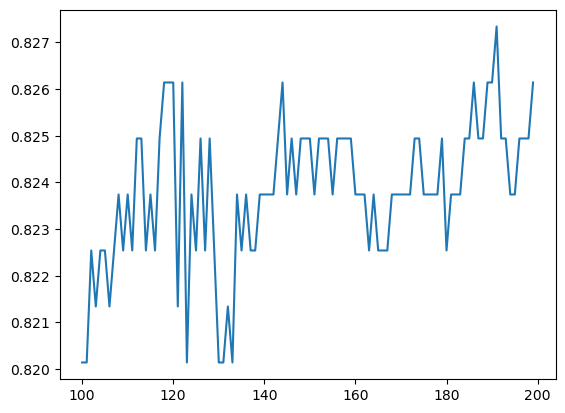

In [ ]:
import matplotlib.pyplot as plt
plt.plot(n,accu)